In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

# plt.rc('font', family='SimHei', size=13)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
df = pd.read_excel("china.xlsx")


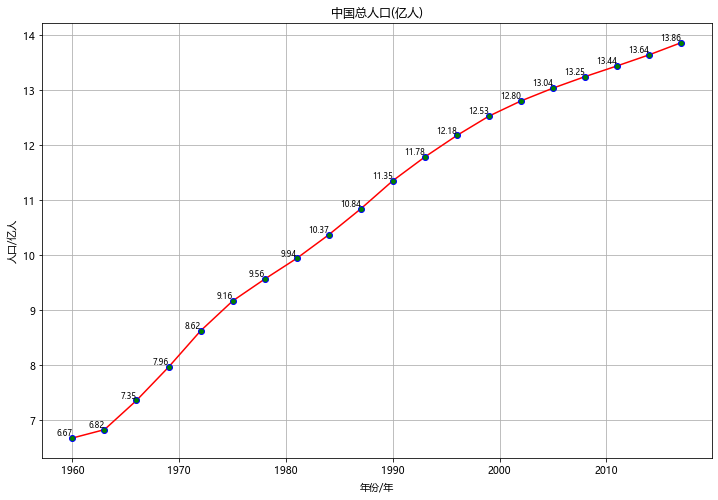

In [80]:
N = 3
year = df.columns.values.tolist()[4:-2:N]
data = df.iloc[-1].values.tolist()[4:-2:N]  
data = np.asarray(data) / 1e+8
plt.figure(figsize=(12,8))
plt.title("中国总人口(亿人)")
plt.plot(year, data,  marker='o', c='red', mec='blue', mfc='g')

plt.xlabel("年份/年")
plt.ylabel("人口/亿人")
for a, b in zip(year, data):
    plt.text(a, b, '%0.2f' % b, ha='right', va='bottom', fontsize=8)

plt.grid()
plt.show()

30


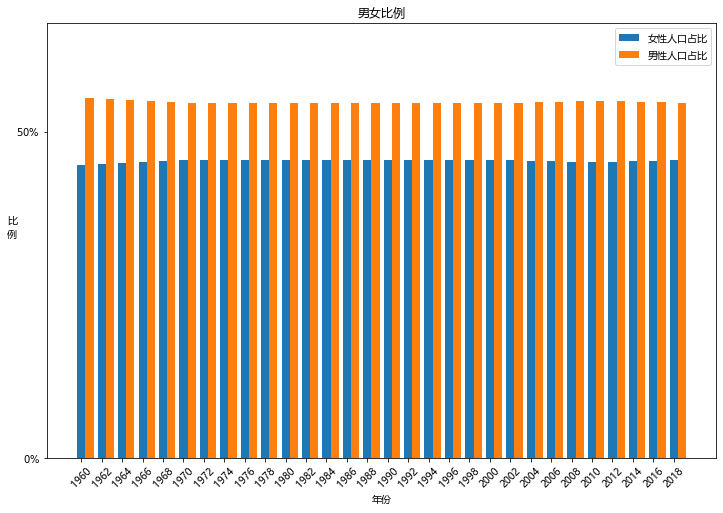

In [81]:
N = 2
year = df.columns.values.tolist()[4:-2:N]
data = df.iloc[-2].values.tolist()[4:-2:N]
female = np.abs(np.asarray(data) - 45) + 10
male = np.abs(100 - np.asarray(data) - 45) + 10

fig = plt.figure(figsize=(12, 8))

size = len(data)
print(size)
x = np.arange(size)
bar_width = 0.4

plt.title("男女比例")
plt.ylim(0, 20)
plt.ylabel("比\n例", rotation=0)
plt.yticks([0, 15], ["$0\%$", "$50\%$"])
plt.xticks(x, year, rotation=45)
plt.xlabel("年份")
plt.bar(x, female,  width=bar_width, label='女性人口占比')
plt.bar(x + bar_width, male, width=bar_width, label='男性人口占比')

plt.legend()
plt.show()

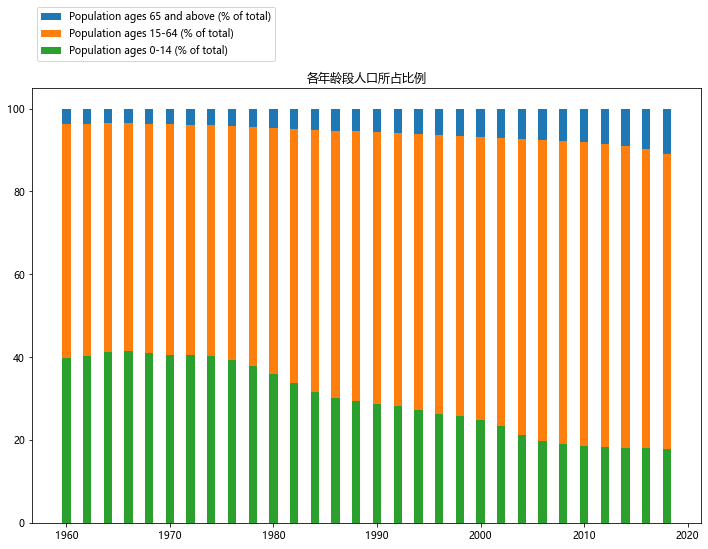

In [82]:
N = 2
fig, ax = plt.subplots(figsize=(12, 8))
year = df.columns.values.tolist()[4:-2:N]
# print(year)
age_0_14 = df.iloc[22].values.tolist()[4:-2:N]
age_15_64 = df.iloc[24].values.tolist()[4:-2:N]
age_65_above = df.iloc[28].values.tolist()[4:-2:N]

ax.bar(year, [100] * len(year), label='Population ages 65 and above (% of total)')
plt.bar(year, np.asarray(age_15_64) + np.asarray(age_0_14), label="Population ages 15-64 (% of total)")
plt.bar(year, age_0_14, label="Population ages 0-14 (% of total)")

plt.title("各年龄段人口所占比例")
# ax.legend(["Population ages 65 and above (% of total)", "Population ages 15-64 (% of total)", "Population ages 0-14 (% of total)"])

ax.legend(loc=3, bbox_to_anchor=(0, 1.05))
plt.show()

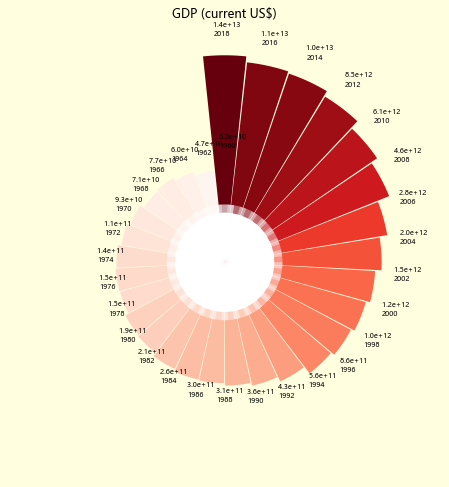

In [83]:
N = 2

year = df.columns.values.tolist()[4:-2:N]
# print(year)

rdata = df.iloc[17].values.tolist()[4:-2:N]
data = np.power(np.asarray(rdata), 1 / 7)

theta = np.linspace(0, 2 * np.pi, len(data))  # 等分极坐标系

# 设置画布
fig = plt.figure(figsize=(8, 8),  # 画布尺寸
                 facecolor='lightyellow'  # 画布背景色
                 )

# 设置极坐标系
ax = plt.axes(polar=True)  # 实例化极坐标系
# ax.set_theta_direction(-1)  # 顺时针为极坐标正方向
ax.set_theta_zero_location('N')  # 极坐标 0° 方向为 N

# 设置渐变色
norm = plt.Normalize(data.min(), data.max())
norm_y = norm(data)
map_vir = cm.get_cmap(name='Reds')
color = map_vir(norm_y)


# 在极坐标系中画柱形图
ax.bar(x=theta,  # 柱体的角度坐标
       height=data,  # 柱体的高度, 半径坐标
       width=np.pi * 2 / len(data),  # 柱体的宽度
       # color=np.random.random((len(data), 3))
       color=color
       )

# 绘制中心空白
ax.bar(x=theta,  # 柱体的角度坐标
       height=18,  # 柱体的高度, 半径坐标
       width=0.33,  # 柱体的宽度
       color='white',
       )

ax.bar(x=theta,  # 柱体的角度坐标
       height=21,  # 柱体的高度, 半径坐标
       width=0.33,  # 柱体的宽度
       color='white',
       alpha=0.4
       )

for angle, rd, d, year in zip(theta, rdata, data, year):
    ax.text(angle+0.05, d + 7, "{:.1e} \n".format(rd) + str(year), fontsize=7, rotation=0)  # "%.2e" % data
ax.set_axis_off()
plt.title("GDP (current US$)")
plt.show()